In [1]:
import numpy as np
import os
import tqdm 
import json

from utils_graph_generation import load_graph, get_paths
from utils_graph_metrics import get_exp, calc_pdf_points, calc_cdf_points, calc_ccdf_points, tresh_normalization, convert_keys_to_float
from utils_graph_plot import plot_degree_distribution, plot_degree_probability_distribution, plot_degree_cummulative_distribution, plot_degree_complementary_cummulative_distribution, plot_yerali


# Distribución de grados
Dado un grafo muestra tres gráficas:
* Un histograma con la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con el acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con la inversa del acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo

In [2]:
def calc_plot_degree_distributions_tres(name_graph, graphs_folder, plots_folder, measures_name, G=None, arr_kt_plot=[5, 10, 20, 50, 100, 150, 200, 250], normalize=False):
    
    # Cargamos el grafo inicial
    if G is None:
        G = load_graph(name_graph, graphs_folder)
        
    arr_points = []
    dict_points = {}
    if os.path.exists(measures_name + '_degs_kt.json'):
        try:
            with open(measures_name + '_degs_kt.json', 'r') as f:
                dict_points = json.load(f)
            dict_points = convert_keys_to_float(dict_points, tipo="int")
        except json.JSONDecodeError:
            pass

    for kt in tqdm.tqdm(arr_kt_plot):
        if not kt in dict_points.keys():
            F = tresh_normalization(G, kt)
            if F != -1:
                points_kt = np.sort(np.array(list(dict(F.degree()).values())).astype(float))
                dict_points[kt] = list(points_kt)
    
        else:
            points_kt = dict_points[kt]
        
        if normalize:
            points_kt = np.array(points_kt) / len(points_kt)

        arr_points.append(points_kt)

    with open(measures_name + '_degs_kt.json', "w") as f:
        json.dump(dict_points, f, indent=2)

    plot_degree_distribution(arr_points, name_graph, plots_folder, arr_kt_plot=arr_kt_plot, alpha=0.45, num_bins=100, max_bins=max(max(k) for k in arr_points), min_bins=min(min(k) for k in arr_points))

    arr_deg_prob = plot_degree_probability_distribution(arr_points, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)
    
    arr_deg_cum = plot_degree_cummulative_distribution(arr_deg_prob, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)

    plot_degree_complementary_cummulative_distribution(arr_deg_cum, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)


In [8]:
MODE = "hashtag"

MANIFESTACION = "nat"
hora = "429624"

MANIFESTACION = "9n"
hora = "437037"

graphs_folder, plots_folder, measures_name = get_paths(MODE, MANIFESTACION, metric="degree", hora=hora)

In [ ]:
calc_plot_degree_distributions_tres(hora, graphs_folder, plots_folder, measures_name, arr_kt_plot=[0], normalize=True)
#calc_yerali(hora, graphs_folder, plots_folder, plfit=True, normalize=False, show_comparative=False, only_ntamas=False)

graphs2/nodes_hashtag/9n/437037.gexf
Cargado el grafo de la hora 437037, numero de nodos: 870, numero de aristas: 9709


100%|██████████| 21/21 [00:00<00:00, 10480.77it/s]


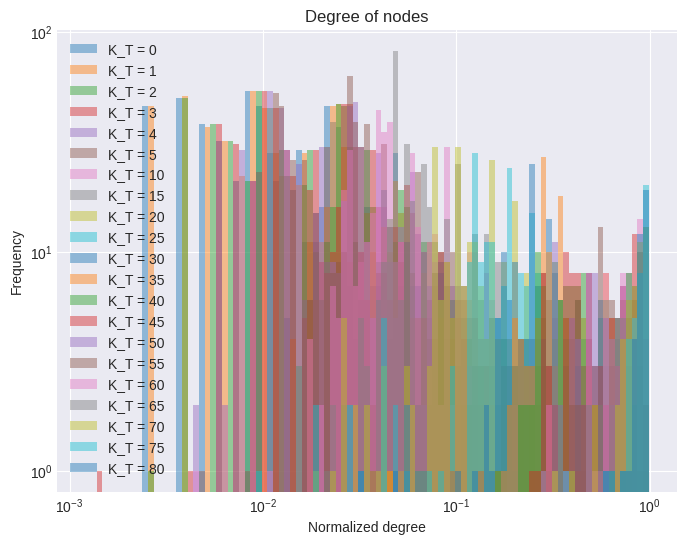

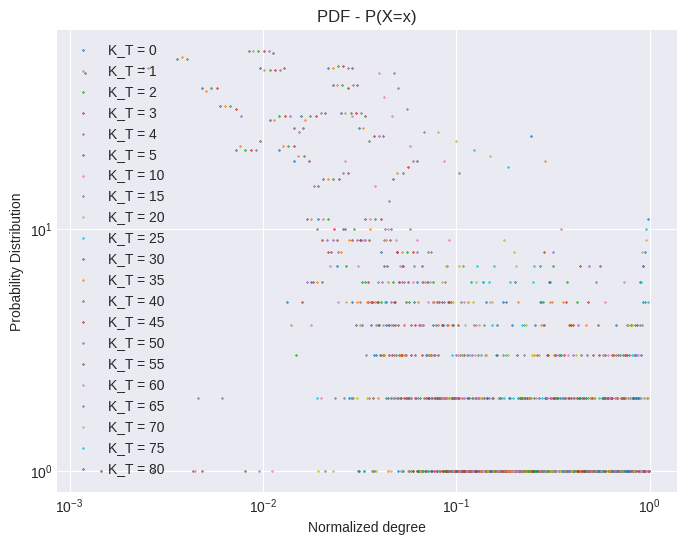

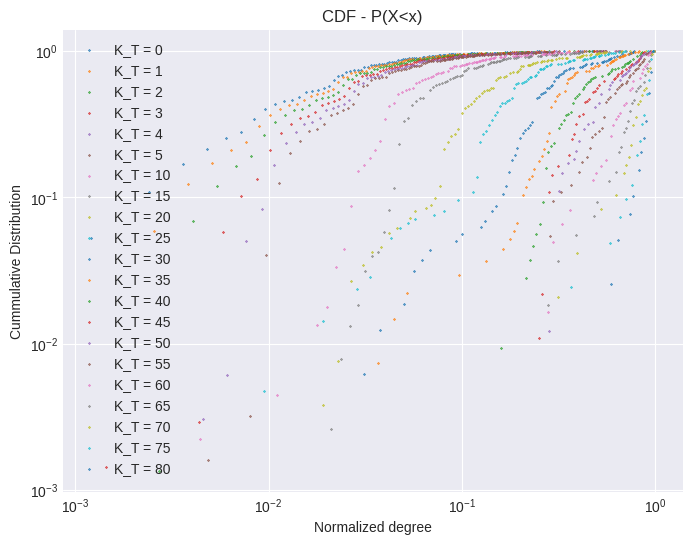

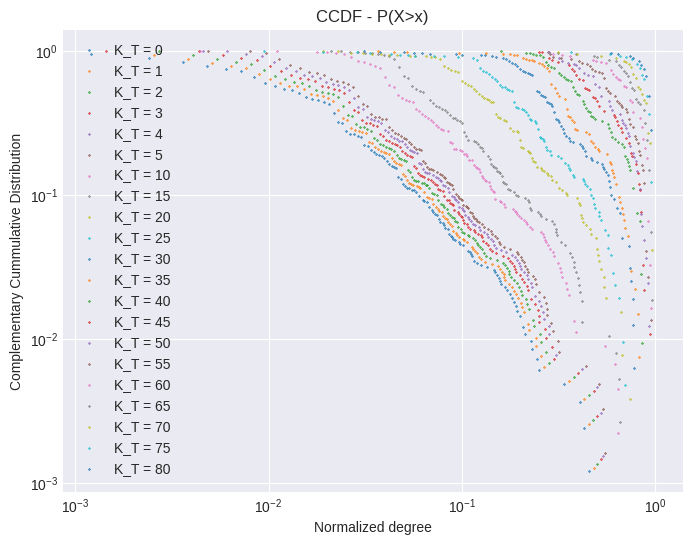

In [9]:
graphs_folder, plots_folder, measures_name = get_paths(MODE, MANIFESTACION, metric="degree", hora=hora)

calc_plot_degree_distributions_tres(hora, graphs_folder, plots_folder, measures_name, arr_kt_plot= [0,1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80], normalize=True)

In [6]:
def calc_yerali(name_graph, graphs_folder, plots_folder, G=None, plfit=True, normalize = False, show_comparative=False, only_ntamas=False):
    G = load_graph(name_graph, graphs_folder)
    
    G = tresh_normalization(G, 0)

    # Normalizamos entre el número total de nodos
    points = np.sort(np.array(list(dict(G.degree()).values())).astype(float))
    plfit = get_exp([points], name_graph, show_comparative=show_comparative, only_ntamas=only_ntamas)

    arr_pdf_points = calc_pdf_points([points], G.number_of_nodes())

    arr_cdf_points = calc_cdf_points(arr_pdf_points)

    arr_ccdf_points = calc_ccdf_points(arr_cdf_points)

    plot_yerali(arr_pdf_points, arr_ccdf_points, plfit)